### Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

ModuleNotFoundError: No module named 'seaborn'

### Loading the provided dataset

In [2]:
data = pd.read_csv("dataset/complex_account_billing_data.csv")

In [3]:
data.head(10)

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT
5,1006,Olivia Davis,2023-01-06,485.654759,Paid,Procedure,General Practice
6,1007,Chris Lee,2023-01-07,2864.738488,Pending,Lab Test,General Practice
7,1008,Sophia Garcia,2023-01-08,244.228596,Pending,Therapy,Neurology
8,1009,Sophia Garcia,2023-01-09,183.370132,Pending,Emergency,Cardiology
9,1010,Olivia Davis,2023-01-10,127.601073,Unpaid,Medication,Dermatology


### Checking data types and summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   Description    110 non-null    object 
 6   Department     110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB


In [5]:
data.describe()

,Account ID,Amount
count,110.000000,110.000000
mean,1048.000000,479.309018
std,28.809721,738.759966
min,1001.000000,50.581003
25%,1023.250000,145.411712
50%,1045.500000,253.709053
75%,1072.750000,392.219435
max,1100.000000,3849.771331


### Checking for missing values

In [6]:
data.isna().sum()

Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64

### Checking for duplicate values

In [7]:
data.duplicated().sum()

0

### Correction of data types

In [8]:
data['Billing Date'] = pd.to_datetime(data['Billing Date'])
data['Amount'] = data['Amount'].astype(float)

### Viewing the categories in the categorical columns

In [9]:
data["Status"].unique()

array(['Pending', 'Paid', 'Unpaid', 'Unknown'], dtype=object)

In [10]:
data["Description"].unique()

array(['Consultation', 'Purchase', 'Lab Test', 'Follow-up', 'Therapy',
       'Procedure', 'Emergency', 'Medication', 'Miscellaneous', 'Refund',
       'Service Fee'], dtype=object)

In [11]:
data["Department"].unique()

array(['Pediatrics', 'Orthopedics', 'Pharmacy', 'ENT', 'General Practice',
       'Neurology', 'Cardiology', 'Dermatology', 'Unknown', 'Radiology',
       'Oncology'], dtype=object)

### Validating the Status and Department Columns

In [12]:
valid_statuses = ['Paid', 'Unpaid', 'Pending']
data = data[data['Status'].isin(valid_statuses)]

In [13]:
valid_statuses = ['Pediatrics', 'Orthopedics', 'Pharmacy', 'ENT', 'General Practice', 'Neurology', 'Cardiology', 'Dermatology', 'Radiology','Oncology']
data = data[data['Department'].isin(valid_statuses)]

In [14]:
data["Department"].unique()

array(['Pediatrics', 'Orthopedics', 'Pharmacy', 'ENT', 'General Practice',
       'Neurology', 'Cardiology', 'Dermatology', 'Radiology', 'Oncology'],
      dtype=object)

In [15]:
data["Status"].unique()

array(['Pending', 'Paid', 'Unpaid'], dtype=object)

### Analyzing Bill Cycle Times

In [16]:
data.sort_values(by=['Account ID', 'Billing Date'], inplace=True)
data['Billing Cycle Time'] = data.groupby('Account ID')['Billing Date'].diff()
average_billing_cycle_time = data['Billing Cycle Time'].mean()
print(f"Average Billing Cycle Time: {average_billing_cycle_time}")

Average Billing Cycle Time: 0 days 00:00:00


### Identifying High Cost Transactions

In [17]:
high_cost_threshold = data['Amount'].quantile(0.95)
high_cost_transactions = data[data['Amount'] > high_cost_threshold]
print(f"High-cost transactions:\n{high_cost_transactions}")

High-cost transactions:
    Account ID Customer Name Billing Date       Amount   Status Description  \
6         1007     Chris Lee   2023-01-07  2864.738488  Pending    Lab Test   
16        1017      John Doe   2023-01-17  2748.478753  Pending      Refund   
31        1032  David Wilson   2023-02-01  2812.330089  Pending   Procedure   
84        1085  Olivia Davis   2023-03-26  3006.661392     Paid   Emergency   
93        1094    Jane Smith   2023-04-04  3593.752963  Pending    Purchase   

          Department Billing Cycle Time  
6   General Practice                NaT  
16               ENT                NaT  
31          Oncology                NaT  
84               ENT                NaT  
93        Pediatrics                NaT  


### Analyzing duplicate payment transactions

In [18]:
duplicate_transactions = data[data.duplicated(subset=['Account ID', 'Billing Date', 'Amount'], keep=False)]
print(f"Duplicate transactions:\n{duplicate_transactions}")

Duplicate transactions:
Empty DataFrame
Columns: [Account ID, Customer Name, Billing Date, Amount, Status, Description, Department, Billing Cycle Time]
Index: []


### Analyzing late payments

In [19]:
late_payments = data[data['Status'] == 'Unpaid']
print(f"Late payments:\n{late_payments}")

Late payments:
     Account ID    Customer Name Billing Date       Amount  Status  \
9          1010     Olivia Davis   2023-01-10   127.601073  Unpaid   
13         1014     David Wilson   2023-01-14   234.349417  Unpaid   
15         1016       Emma Brown   2023-01-16    51.400493  Unpaid   
100        1016       Emma Brown   2023-01-16    63.786910  Unpaid   
20         1021         John Doe   2023-01-21   492.571652  Unpaid   
21         1022       Emma Brown   2023-01-22  1194.216873  Unpaid   
24         1025     David Wilson   2023-01-25   289.625322  Unpaid   
25         1026        Chris Lee   2023-01-26   224.110767  Unpaid   
105        1026        Chris Lee   2023-01-26   182.072114  Unpaid   
30         1031    Liam Martinez   2023-01-31  1589.820779  Unpaid   
34         1035    Sophia Garcia   2023-02-04   325.921589  Unpaid   
35         1036        Chris Lee   2023-02-05   374.704797  Unpaid   
38         1039    Sophia Garcia   2023-02-08   145.869477  Unpaid   
44   

In [20]:
average_payment_amount = data['Amount'].mean()
payment_discrepancies = data[data['Amount'] != data.groupby('Account ID')['Amount'].transform('mean')]

print(f"Average Payment Amount: {average_payment_amount}")
print(f"Payment discrepancies:\n{payment_discrepancies}")

Average Payment Amount: 467.2742140387
Payment discrepancies:
     Account ID    Customer Name Billing Date       Amount   Status  \
15         1016       Emma Brown   2023-01-16    51.400493   Unpaid   
100        1016       Emma Brown   2023-01-16    63.786910   Unpaid   
16         1017         John Doe   2023-01-17  2748.478753  Pending   
101        1017         John Doe   2023-01-17  2526.258343  Pending   
17         1018  Mason Rodriguez   2023-01-18   442.279951     Paid   
102        1018  Mason Rodriguez   2023-01-18   376.162550     Paid   
18         1019     Olivia Davis   2023-01-19   143.558787     Paid   
103        1019     Olivia Davis   2023-01-19    76.545003     Paid   
19         1020     Olivia Davis   2023-01-20   139.148779     Paid   
104        1020     Olivia Davis   2023-01-20    94.776324     Paid   
25         1026        Chris Lee   2023-01-26   224.110767   Unpaid   
105        1026        Chris Lee   2023-01-26   182.072114   Unpaid   
26         1027

# Data Visualization

### Distribution of billing payments

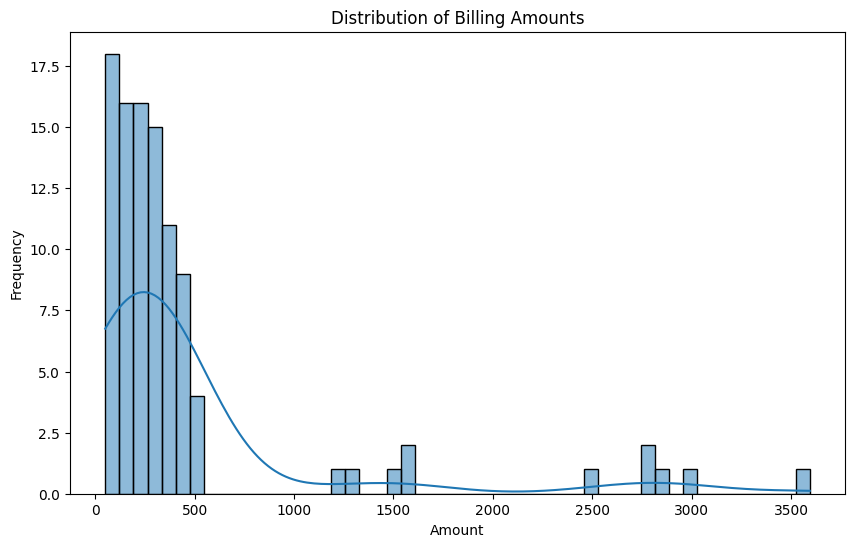

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [34]:
import os
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [37]:
from langchain_community.llms import Ollama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [38]:
model_insights = Ollama(model="llama3")
model_report = Ollama(model="llama3")

In [39]:
# Define function to generate insights
def generate_insights(data):
    prompt = f"Analyze the billing data:\n{data}\nGenerate insights and observations."
    return model_insights(prompt)

# Define function to write a detailed report
def write_report(analysis, insights):
    prompt = f"Based on the billing analysis:\n{analysis}\nGenerate a detailed report with the following insights:\n{insights}"
    return model_report(prompt)

In [40]:
billing_data = {
    'avg_billing_cycle': '0 days 00:00:00',
    'high_cost_transactions': 5,
    'late_payments': 33,
    'avg_payment_amount': 467.2742140387,
    'payment_discrepancies': 18,
    'total_transactions': 44
}

# Generate insights
analysis = "Detailed analysis of billing data."
insights = generate_insights(billing_data)

# Generate report
final_report = write_report(analysis, insights)

# Print or use the final report
print(final_report)

C:\Users\User\miniconda3\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


**Billing Analysis Report**

**Introduction:**
This report provides a detailed analysis of our billing data, highlighting key trends, insights, and areas for improvement. The findings aim to inform strategic decisions that drive growth, optimize revenue, and enhance customer satisfaction.

**Payment Timeliness:**
Our billing data reveals 33 instances of late payments, indicating a significant issue with payment timeliness. This trend can impact cash flow and relationships with clients. To address this, we recommend implementing strategies to improve payment timeliness, such as offering incentives for early payments or simplifying the payment process.

**Cost Structure:**
The presence of high-cost transactions (5) suggests that certain services or products may be more expensive than others. Analyzing these transactions can help us optimize pricing or identify opportunities to reduce costs and increase revenue.

**Payment Amounts:**
The average payment amount is relatively high at $467.2